# Chapter5 课堂示例——Python文本挖掘

In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

## 安装包

### nltk包组件安装

In [3]:
!pip install nltk

In [4]:
# nltk安装组件
# nltk.download()

In [5]:
import nltk
# 设置nltk数据路径
# nltk.data.path.append(r"E:/nltk_data/nltk_data/")

### 其他包

In [6]:
## 安装包
# !pip install gensim # 安装gensim包

In [7]:
!pip install wordcloud #安装词云

ERROR: Invalid requirement: '#安装词云': Expected package name at the start of dependency specifier
    #安装词云
    ^


In [8]:
!pip install jieba

In [9]:
!pip install zhon

In [10]:
!pip install mglearn

## 英文文本

In [11]:
corpus_en = ['I come to China to travel.',
             'This is a car polupar in China.',
             'I love tea and Apple.',
             'The work is to write some papers in science.']

### 词袋模型（Bag of Words, BOW）

该模型基于词频，将文本转换成向量，而不考虑词序。

#### 分词（Tokenization）

**什么是Tokenization？**
+ 文本是不能成段送入模型中进行分析的，我们通常会把文本切成有独立含义的字、词或者短语，这个过程叫做tokenization，这通常是大家解决自然语言处理问题的第一步。

**NLTK如何做Tokenization？**
+ NLTK中提供了2种不同方式的tokenization，sentence tokenization 和 word tokenization，前者把文本进行“断句”，后者对文本进行“分词”。

In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to E:\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [13]:
from nltk.tokenize import word_tokenize

s = 'I love him.'
word_tokenize(s)

['I', 'love', 'him', '.']

#### 单词转为特征向量

 vectorization(向量化) 是转化文本集合为数值向量的普遍方法。这种特殊思想，包括令牌化，统计频数和归一化，被称为 Bag of Words(词袋子) 或 “Bag of n-grams” 模型。文本被词出现频率描述，完全忽略词的相对位置信息。

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(corpus_en)

CountVectorizer()

In [15]:
print("feature_names size: {}".format(len(vect.get_feature_names_out())))
print(vect.get_feature_names_out())

feature_names size: 19
['and' 'apple' 'car' 'china' 'come' 'in' 'is' 'love' 'papers' 'polupar'
 'science' 'some' 'tea' 'the' 'this' 'to' 'travel' 'work' 'write']


In [16]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary size: 19
Vocabulary content:
 {'come': 4, 'to': 15, 'china': 3, 'travel': 16, 'this': 14, 'is': 6, 'car': 2, 'polupar': 9, 'in': 5, 'love': 7, 'tea': 12, 'and': 0, 'apple': 1, 'the': 13, 'work': 17, 'write': 18, 'some': 11, 'papers': 8, 'science': 10}


In [17]:
bag_of_words = vect.transform(corpus_en)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <4x19 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>


In [18]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0]
 [0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1]]


In [19]:
# 简洁用法
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
bag_of_words = vect.fit_transform(corpus_en)

In [20]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,and,apple,car,china,come,in,is,love,papers,polupar,science,some,tea,the,this,to,travel,work,write
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0
1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1


#### ngram语言模型

+ N-gram模型是一种语言模型（Language Model），语言模型是一个基于概率的判别模型，它的输入是一句话（单词的顺序序列），输出是这句话的概率，即这些单词的联合概率（joint probability）。
+ N-gram本身也指一个由N个单词组成的集合，各单词具有先后顺序，且不要求单词之间互不相同。
+ 常用的有 Bi-gram (N=2) 和 Tri-gram (N=3)，一般已经够用了。
+ 
+ 例如,"I love deep learning"，可以分解的 Bi-gram 和 Tri-gram ：
+ Bi-gram : {I, love}, {love, deep}, {love, deep}, {deep, learning}
+ Tri-gram : {I, love, deep}, {love, deep, learning}
+ 
+ sklearn库中的CountVectorizer 有一个参数ngram_range，如果赋值为(2,2)则为Bigram，当然使用语言模型会大大增加我们字典的大小。

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vect.fit_transform(corpus_en)

In [22]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,and apple,car polupar,china to,come to,in china,in science,is car,is to,love tea,papers in,polupar in,some papers,tea and,the work,this is,to china,to travel,to write,work is,write some
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,1


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2))
bag_of_words = vect.fit_transform(corpus_en)

In [24]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,and,and apple,apple,car,car polupar,china,china to,come,come to,in,...,this is,to,to china,to travel,to write,travel,work,work is,write,write some
0,0,0,0,0,0,1,1,1,1,0,...,0,2,1,1,0,1,0,0,0,0
1,0,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,1,1,1


### 文本统计和可视化

#### 词频统计

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
bag_of_words = vect.fit_transform(corpus_en)

In [26]:
bag_of_words.toarray().sum(axis=0)

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1])

In [27]:
pd.Series(bag_of_words.toarray().sum(axis=0), index=vect.get_feature_names_out())

and        1
apple      1
car        1
china      2
come       1
in         2
is         2
love       1
papers     1
polupar    1
science    1
some       1
tea        1
the        1
this       1
to         3
travel     1
work       1
write      1
dtype: int64

#### 词云图

In [28]:
clean_all_words = ' '.join([' '.join(sentence) for sentence in vect.inverse_transform(bag_of_words)])
clean_all_words

'come to china travel china this is car polupar in love tea and apple to is in the work write some papers science'

(np.float64(-0.5), np.float64(999.5), np.float64(879.5), np.float64(-0.5))

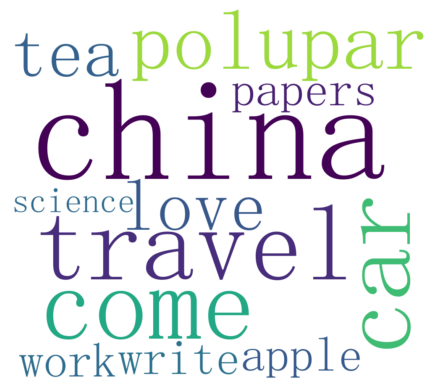

In [29]:
# 生成词云
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator  # 引入词云WordCloud

# WordCloud()设定词云参数，.generate()将str文本生成词云
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/simfang.ttf", 
    background_color="white",
    width=1000,
    height=880,
).generate(clean_all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# wordcloud.to_file("cloud1.jpg") # 保存图片

(np.float64(-0.5), np.float64(639.5), np.float64(1328.5), np.float64(-0.5))

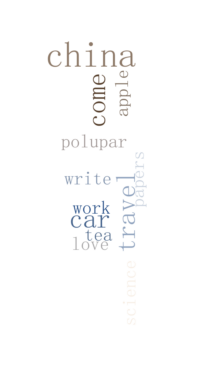

In [30]:
# 设置图云背景
from wordcloud import WordCloud, ImageColorGenerator  # 引入词云WordCloud
from PIL import Image
import numpy as np

# 文件路径需要加引号
path_img = './background/conan.jpg'

# 创建图片，这是为了替换WordCloud默认的长方形输出形状
background_image = np.array(Image.open(path_img))

wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/simfang.ttf", # 设定文字的类型为中文黑体
    background_color="white", # 设定图片背景为白色。默认为黑色。
    width=100,
    height=88,
    scale=1, # 设定图片像素密度为15.默认之为1。
    mask = background_image # 设定词云形状是background_image。
).generate(clean_all_words) # 注意是clean_all_words

image_colors = ImageColorGenerator(background_image) # 提取图片的色彩分布
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation="bilinear") # 替换默认的字体颜色

plt.axis("off") # 关闭坐标轴显示

# wordcloud.to_file("./output/cloud.jpg") # 保存图片

### 文本清洗

In [31]:
import re
import string

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    # 定义常见的表情符号模式
    emoticon_pattern = r'(?::|;|=)(?:-)?(?:\)|\(|D|P|d|p|O|o|S|s|\||\\|/|\*|\+|\^)'
    
    # 找到所有表情符号并用占位符替换
    emoticons = re.findall(emoticon_pattern, text)
    for i, emoticon in enumerate(emoticons):
        text = text.replace(emoticon, f' EMOTICON{i} ', 1)
    
    # 移除标点符号（除了已被占位符保护的表情）
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    
    # 恢复表情符号
    for i, emoticon in enumerate(emoticons):
        text = text.replace(f'EMOTICON{i}', emoticon)
    
    # 清理多余空格
    text = ' '.join(text.split())
    
    return text

# 测试示例
test_text = "Hello! How are you? :) I'm great! :D But feeling sad sometimes :("
cleaned_text = preprocessor(test_text)
print(f"{test_text}")
print(f"{cleaned_text}")

Hello! How are you? :) I'm great! :D But feeling sad sometimes :(
Hello How are you :) Im great :D But feeling sad sometimes :(


#### 大小写转化

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(lowercase=False)
bag_of_words = vect.fit_transform(corpus_en)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <4x19 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>


In [33]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,Apple,China,The,This,and,car,come,in,is,love,papers,polupar,science,some,tea,to,travel,work,write
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,0
1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,1


#### 词干提取（Stemming）

**什么是词干提取？**
+ 词干提取是指基于简单的规则，去掉词语的后缀，比如 “ing”, “ly”, “s”等。

**NLTK如何实现词干提取？**
+ 词干提取：PorterStemmer，LancasterStemmer和SnowballStemmer

In [34]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english") # Choose a language
stemmer.stem("countries") # Stem a word

'countri'

##### 采用词干提取清理数据

In [35]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import SnowballStemmer

def custom_tokenizer(document):
    stemmer = SnowballStemmer("english")
    docs = pos_tag(word_tokenize(document))
    return [stemmer.stem(token[0]) for token in docs]

# 利用自定义分词器来定义一个计数向量器
stemmer_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=2, token_pattern=None)

In [36]:
bag_of_words = stemmer_vect.fit_transform(corpus_en)
pd.DataFrame(bag_of_words.toarray(), columns=stemmer_vect.get_feature_names_out())

,.,china,i,in,is,to
0,1,1,1,0,0,2
1,1,1,0,1,1,0
2,1,0,1,0,0,0
3,1,0,0,1,1,1


#### 词形还原（Lemmatization）

**什么是词形还原？**
+ 词形还原与词干提取类似，但比词干提取更加有效，因为它把词语转换为它的词根，而不仅仅是去掉后缀。它利用了整个词表，进行形态学分析以得到词根。因此，比起词干提取，我们更倾向于词形还原，不过在NLTK中，词干提取的速度比较快。

**NLTK如何实现词形还原？**

In [37]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

wnl.lemmatize('countries')

'country'

In [38]:
wnl.lemmatize('worked') # worked有很多词性

'worked'

In [39]:
wnl.lemmatize('worked', pos='v') # 需要指定词性

'work'

##### 采用词性还原清理数据

In [40]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     E:\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [41]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

def custom_tokenizer(document):
    wnl = WordNetLemmatizer()
    docs = pos_tag(word_tokenize(document))
    return [wnl.lemmatize(token[0]) for token in docs]

# 利用自定义分词器来定义一个计数向量器
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=2)

In [42]:
bag_of_words = lemma_vect.fit_transform(corpus_en)
print("bag_of_words: {}".format(repr(bag_of_words)))
pd.DataFrame(bag_of_words.toarray(), columns=lemma_vect.get_feature_names_out())

bag_of_words: <4x6 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>


,.,china,i,in,is,to
0,1,1,1,0,0,2
1,1,1,0,1,1,0
2,1,0,1,0,0,0
3,1,0,0,1,1,1


### TF-IDF数据缩放

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(use_idf=True, norm='l2', smooth_idf=True)
bag_of_words = vect.fit_transform(corpus_en)

In [44]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,and,apple,car,china,come,in,is,love,papers,polupar,science,some,tea,the,this,to,travel,work,write
0,0.0,0.0,0.000000,0.348842,0.442462,0.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.00000,0.0,0.00000,0.000000,0.697684,0.442462,0.00000,0.00000
1,0.0,0.0,0.453386,0.357455,0.000000,0.357455,0.357455,0.0,0.00000,0.453386,0.00000,0.00000,0.0,0.00000,0.453386,0.000000,0.000000,0.00000,0.00000
2,0.5,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.00000,0.000000,0.00000,0.00000,0.5,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
3,0.0,0.0,0.000000,0.000000,0.000000,0.281132,0.281132,0.0,0.35658,0.000000,0.35658,0.35658,0.0,0.35658,0.000000,0.281132,0.000000,0.35658,0.35658


### 文本选择

#### 停用词（Stopwords）

**什么是停用词？**
+ 在自然语言处理的很多任务中，我们处理的主体“文本”中有一些功能词经常出现，然而对于最后的任务目标并没有帮助，甚至会对统计方法带来一些干扰，我们把这类词叫做停用词，通常我们会用一个停用词表把它们过滤出来。比如英语当中的定冠词/不定冠词(a,an,the等)。

**NLTK如何去除停用词？**

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to E:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['somehow', 'onto', 'these', 'whereupon', 'thence', 'always', 'himself', 'name', 'yourself', 'formerly', 'that', 'nine', 'it', 'how', 'the', 'found', 'in', 'twelve', 'except', 'besides', 'anywhere', 'have', 'beforehand', 'we', 'myself', 'wherein', 'otherwise', 'on', 'system', 'throughout', 'former', 'rather']


In [47]:
from nltk.corpus import stopwords

# 获取停用词表
stopword = stopwords.words('english')
print("Number of stop words: {}".format(len(stopword)))
print("Every 10th stopword:\n{}".format(list(stopword)[::10]))

Number of stop words: 198
Every 10th stopword:
['a', 'and', 'before', 'd', "don't", "hadn't", "he'll", 'i', 'it', 'ma', 'needn', 'once', 're', 'shouldn', 'the', "they'll", 'up', 'were', 'whom', "you'd"]


In [48]:
# 指定stop_words="english"将使用内置列表。
# 也可以扩展这个列表并传入我们自己的列表。
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english")
bag_of_words = vect.fit_transform(corpus_en)

In [49]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,apple,car,china,come,love,papers,polupar,science,tea,travel,work,write
0,0,0,1,1,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,0,1,1


**提示**
+ 如果我们想要修改 NLTK 的停用词列表，可以去我们一开始提到的下载的资源中去修改。具体位置是在 nltk_data --> corpora --> stopwords 文件夹中，进入这个文件夹后，我们会发现很多种语言的停用词列表，然后按照自己的需要进行修改即可。

#### 低频词和高频词

In [50]:
vect = CountVectorizer(min_df=2, max_df=4)
bag_of_words = vect.fit_transform(corpus_en)
print("X_train with stop words:\n{}".format(repr(bag_of_words)))

X_train with stop words:
<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>


In [51]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,china,in,is,to
0,1,0,0,2
1,1,1,1,0
2,0,0,0,0
3,0,1,1,1


#### 词性标注（Part-of-speech Tagging）

**什么是词性标注？**
+ 词性（part-of-speech）是词汇基本的语法属性，通常也称为词性。
+ 词性标注（part-of-speech tagging）,又称为词类标注或者简称标注，是指为分词结果中的每个单词标注一个正确的词性的程序，也即确定每个词是名词、动词、形容词或者其他词性的过程。

**NLTK如何做词性标注？**

In [52]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize

s = 'I love him.'
pos_tag(word_tokenize(s))

[('I', 'PRP'), ('love', 'VBP'), ('him', 'PRP'), ('.', '.')]

#### 利用词性标注清理数据

In [53]:
pos_tag_list = ['PRP', 'VBP', 'JJ', 'RB	']

def custom_tokenizer(document):
    docs = pos_tag(word_tokenize(document))
    return [token[0] for token in docs if token[1] in pos_tag_list]

# 利用自定义分词器来定义一个计数向量器
pos_tag_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=1, token_pattern=None)

In [54]:
bag_of_words = pos_tag_vect.fit_transform(corpus_en)
pd.DataFrame(bag_of_words.toarray(), columns=pos_tag_vect.get_feature_names_out())

,come,i,love
0,1,1,0
1,0,0,0
2,0,0,1
3,0,0,0


|标注|含义|释义|例子|
|:---:|:---:|:---:|:---:|
|CC|Coordinating conjunction|连词|and, or,but, if, while,although|
|CD|Cardinal number|数词|twenty-four, fourth, 1991,14:24|
|DT|Determiner|限定词|the, a, some, most,every, no|
|EX|Existential there|存在量词|there, there’s|
|FW|Foreign word|外来词|dolce, ersatz, esprit, quo,maitre|
|IN|Preposition or subordinating conjunction|介词连词|on, of,at, with,by,into, under|
|JJ|Adjective|形容词|new,good, high, special, big, local|
|JJR|Adjective, comparative|比较级词语|bleaker braver breezier briefer brighter brisker|
|JJS|Adjective, superlative|最高级词语|calmest cheapest choicest classiest cleanest clearest|
|LS|List item marker|标记|A A. B B. C C. D E F First G H I J K|
|MD|Modal|情态动词|can cannot could couldn’t|
|NN|Noun, singular or mass|名词|year,home, costs, time, education|
|NNS|Noun, plural|名词复数|undergraduates scotches|
|NNP|Proper noun, singular|专有名词|Alison,Africa,April,Washington|
|NNPS|Proper noun, plural|专有名词复数|Americans Americas Amharas Amityvilles|
|PDT|Predeterminer|前限定词|all both half many|
|POS|Possessive ending|所有格标记|’ ‘s|
|PRP|Personal pronoun|人称代词|hers herself him himself hisself|
|PRP\$|Possessive pronoun|所有格|her his mine my our ours|
|RB|Adverb|副词|occasionally unabatingly maddeningly|
|RBR|Adverb, comparative|副词比较级|further gloomier grander|
|RBS|Adverb, superlative|副词最高级|best biggest bluntest earliest|
|RP|Particle|虚词|aboard about across along apart|
|SYM|Symbol|符号|% & ’ ” ”. ) )|
|TO|to|词to|to|
|UH|Interjection|感叹词|Goodbye Goody Gosh Wow|
|VB|Verb, base form|动词|ask assemble assess|
|VBD|Verb, past tense|动词过去式|dipped pleaded swiped|
|VBG|Verb, gerund or present participle|动词现在分词|telegraphing stirring focusing|
|VBN|Verb, past participle|动词过去分词|multihulled dilapidated aerosolized|
|VBP|Verb, non-3rd person singular present|动词现在式非第三人称时态|predominate wrap resort sue|
|VBZ|Verb, 3rd person singular present|动词现在式第三人称时态|bases reconstructs marks|
|WDT|Wh-determiner|Wh限定词|who,which,when,what,where,how|
|WP|Wh-pronoun|WH代词|that what whatever|
|WP$|Possessive wh-pronoun|WH代词所有格|whose|
|WRB|Wh-adverb|WH副词| |

### 文本挖掘

#### 文本相似度

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
bag_of_words = vect.fit_transform(corpus_en)

In [56]:
import numpy as np

def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.asmatrix(vector_a)
    vector_b = np.asmatrix(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    # 归一化
    sim = 0.5 + 0.5 * cos
    return sim

In [57]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,and,apple,car,china,come,in,is,love,papers,polupar,science,some,tea,the,this,to,travel,work,write
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0
1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1


In [58]:
# 基于词频特征向量
vector1 = bag_of_words.toarray()[0]
vector2 = bag_of_words.toarray()[1]

In [59]:
cos_sim(vector1, vector2)

np.float64(0.5771516749810459)

#### 情感分析

In [60]:
!pip install TextBlob

In [61]:
text = "I am happy today. I feel sad today."

In [62]:
from textblob import TextBlob
blob = TextBlob(text)
blob

TextBlob("I am happy today. I feel sad today.")

In [63]:
blob.sentences

[Sentence("I am happy today."), Sentence("I feel sad today.")]

In [64]:
blob.sentences[0].sentiment

Sentiment(polarity=0.8, subjectivity=1.0)

In [65]:
blob.sentences[1].sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

#### 文本聚类

##### KMeans

In [66]:
import pandas as pd
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,and,apple,car,china,come,in,is,love,papers,polupar,science,some,tea,the,this,to,travel,work,write
0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0
1,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1


In [67]:
from sklearn.cluster import KMeans

X = bag_of_words.toarray().T
clf = KMeans(n_clusters=3)
s = clf.fit(X)
cluster_labels = clf.labels_

In [68]:
words = pd.DataFrame() # to DataFrame
words['words'] = vect.get_feature_names_out()
words['labels'] = cluster_labels
words

,words,labels
0,and,2
1,apple,2
2,car,0
3,china,0
4,come,0
5,in,1
6,is,1
7,love,2
8,papers,1
9,polupar,0


In [69]:
words.groupby('labels')['words'].unique()

labels
0            [car, china, come, polupar, this, travel]
1    [in, is, papers, science, some, the, to, work,...
2                              [and, apple, love, tea]
Name: words, dtype: object

##### LDA主题建模

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
bag_of_words = vect.fit_transform(corpus_en)

In [71]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3,
                                learning_method="batch",
                                max_iter=25,
                                random_state=0)
document_topics = lda.fit_transform(bag_of_words)

In [72]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [73]:
import mglearn
mglearn.tools.print_topics(topics=range(3),
                           feature_names=feature_names,
                           sorting=sorting,
                           topics_per_chunk=5,
                           n_words=5)

topic 0       topic 1       topic 2       
--------      --------      --------      
write         china         tea           
work          polupar       love          
papers        car           apple         
science       travel        travel        
love          come          come          




## 中文文本

In [74]:
corpus_cn = ['我来中国旅游。',
          '这是一辆在中国很流行的汽车。',
          '我喜欢茶和苹果。',
          '工作是写一些科学论文。']

### 词袋模型（Bag of Words, BOW）

该模型基于词频，将文本转换成向量，而不考虑词序。

#### 分词（Tokenization）

**什么是Tokenization？**
+ 文本是不能成段送入模型中进行分析的，我们通常会把文本切成有独立含义的字、词或者短语，这个过程叫做tokenization，这通常是大家解决自然语言处理问题的第一步。

**中文如何做Tokenization？**

In [75]:
import jieba #分词包

In [76]:
sentence = "我来到北京清华大学"
sentence

'我来到北京清华大学'

+ 全模式：把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义

In [77]:
words = jieba.cut(sentence, cut_all=True)
print("全模式:", "/".join(words))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\VICTOL~1\AppData\Local\Temp\jieba.cache
Loading model cost 2.277 seconds.
Prefix dict has been built successfully.


全模式: 我/来到/北京/清华/清华大学/华大/大学


+ 精确模式：试图将句子最精确地切开，适合文本分析

In [78]:
words = jieba.cut(sentence)
print("精确模式:", "/".join(words))

精确模式: 我/来到/北京/清华大学


+ 搜索引擎模式：在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词

In [79]:
words = jieba.cut_for_search(sentence)
print("搜索模式:", "/".join(words))

搜索模式: 我/来到/北京/清华/华大/大学/清华大学


+ 列表模式

In [80]:
words = jieba.lcut(sentence, cut_all=False)
words

['我', '来到', '北京', '清华大学']

##### 添加词典

In [81]:
sentence = "周杰伦来到北京清华大学"

words = jieba.cut(sentence)
print("/".join(words))

周杰伦/来到/北京/清华大学


In [82]:
sentence = "华晨宇来到北京清华大学"

words = jieba.cut(sentence)
print("/".join(words))

华晨/宇/来到/北京/清华大学


+ 添加词典

In [83]:
jieba.add_word('华晨宇')

In [84]:
words = jieba.cut(sentence)
print("精确模式:", "/".join(words))

精确模式: 华晨宇/来到/北京/清华大学


In [85]:
tokenized_words = jieba.lcut(sentence)
tokenized_words

['华晨宇', '来到', '北京', '清华大学']

#### 单词转为特征向量

 vectorization(向量化) 是转化文本集合为数值向量的普遍方法。这种特殊思想，包括令牌化，统计频数和归一化，被称为 Bag of Words(词袋子) 或 “Bag of n-grams” 模型。文本被词出现频率描述，完全忽略词的相对位置信息。

In [86]:
corpus_cn = [' '.join(jieba.lcut(s, cut_all = False)) for s in corpus_cn]
corpus_cn

['我来 中国 旅游 。', '这是 一辆 在 中国 很 流行 的 汽车 。', '我 喜欢 茶 和 苹果 。', '工作 是 写 一些 科学论文 。']

In [87]:
from zhon.hanzi import punctuation

def custom_tokenizer(document):
    words = jieba.lcut(document)
    docs = [word for word in words if word not in punctuation]
    return docs

# 利用自定义分词器来定义一个计数向量器
custom_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=1)

In [88]:
bag_of_words = custom_vect.fit_transform(corpus_cn)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <4x21 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>


In [89]:
pd.DataFrame(bag_of_words.toarray(), columns=custom_vect.get_feature_names_out())

,,一些,一辆,中国,写,和,喜欢,在,工作,很,...,我来,旅游,是,汽车,流行,的,科学论文,苹果,茶,这是
0,3,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,8,0,1,1,0,0,0,1,0,1,...,0,0,0,1,1,1,0,0,0,1
2,5,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,5,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


#### ngram语言模型

+ N-gram模型是一种语言模型（Language Model），语言模型是一个基于概率的判别模型，它的输入是一句话（单词的顺序序列），输出是这句话的概率，即这些单词的联合概率（joint probability）。
+ N-gram本身也指一个由N个单词组成的集合，各单词具有先后顺序，且不要求单词之间互不相同。
+ 常用的有 Bi-gram (N=2) 和 Tri-gram (N=3)，一般已经够用了。
+ 
+ 例如,"I love deep learning"，可以分解的 Bi-gram 和 Tri-gram ：
+ Bi-gram : {I, love}, {love, deep}, {love, deep}, {deep, learning}
+ Tri-gram : {I, love, deep}, {love, deep, learning}
+ 
+ sklearn库中的CountVectorizer 有一个参数ngram_range，如果赋值为(2,2)则为Bigram，当然使用语言模型会大大增加我们字典的大小。

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vect.fit_transform(corpus_cn)

In [91]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,一些 科学论文,一辆 中国,中国 旅游,中国 流行,喜欢 苹果,工作 一些,我来 中国,流行 汽车,这是 一辆
0,0,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,1,0,0,0


### 文本可视化：词云图

In [92]:
clean_all_words = ' '.join([' '.join(sentence) for sentence in vect.inverse_transform(bag_of_words)])
clean_all_words

'我来 中国 中国 旅游 这是 一辆 一辆 中国 中国 流行 流行 汽车 喜欢 苹果 工作 一些 一些 科学论文'

(np.float64(-0.5), np.float64(999.5), np.float64(879.5), np.float64(-0.5))

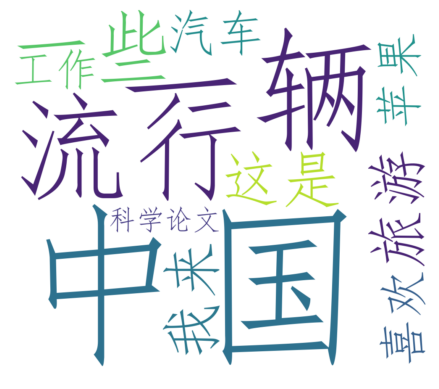

In [93]:
# 生成词云
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator  # 引入词云WordCloud

# WordCloud()设定词云参数，.generate()将str文本生成词云
wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/simfang.ttf", 
    background_color="white",
    width=1000,
    height=880,
).generate(clean_all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# wordcloud.to_file("cloud1.jpg") # 保存图片

(np.float64(-0.5), np.float64(639.5), np.float64(1328.5), np.float64(-0.5))

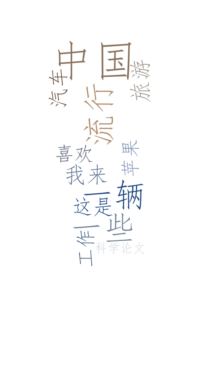

In [94]:
# 设置图云背景
from wordcloud import WordCloud, ImageColorGenerator  # 引入词云WordCloud
from PIL import Image
import numpy as np

# 文件路径需要加引号
path_img = './background/conan.jpg'

# 创建图片，这是为了替换WordCloud默认的长方形输出形状
background_image = np.array(Image.open(path_img))

wordcloud = WordCloud(
    font_path="C:/Windows/Fonts/simfang.ttf", # 设定文字的类型为中文黑体
    background_color="white", # 设定图片背景为白色。默认为黑色。
    width=100,
    height=88,
    scale=1, # 设定图片像素密度为15.默认之为1。
    mask = background_image # 设定词云形状是background_image。
).generate(clean_all_words) # 注意是clean_all_words

image_colors = ImageColorGenerator(background_image) # 提取图片的色彩分布
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation="bilinear") # 替换默认的字体颜色

plt.axis("off") # 关闭坐标轴显示

# wordcloud.to_file("./output/cloud.jpg") # 保存图片

### TF-IDF数据缩放

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
bag_of_words = vect.fit_transform(corpus_cn)

In [96]:
import pandas as pd
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,一些,一辆,中国,喜欢,工作,我来,旅游,汽车,流行,科学论文,苹果,这是
0,0.00000,0.000000,0.486934,0.000000,0.00000,0.617614,0.617614,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.00000,0.465162,0.366739,0.000000,0.00000,0.000000,0.000000,0.465162,0.465162,0.00000,0.000000,0.465162
2,0.00000,0.000000,0.000000,0.707107,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.707107,0.000000
3,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000


### 文本选择

#### 停用词（Stopwords）

**什么是停用词？**
+ 在自然语言处理的很多任务中，我们处理的主体“文本”中有一些功能词经常出现，然而对于最后的任务目标并没有帮助，甚至会对统计方法带来一些干扰，我们把这类词叫做停用词，通常我们会用一个停用词表把它们过滤出来。比如英语当中的定冠词/不定冠词(a,an,the等)。

**Jieba如何去除停用词？**

In [97]:
# 读取停用词表

with open('./stopwords/哈工大停用词表.txt', 'r', encoding = 'utf-8') as f:
    stopwords = f.read()
stopwords = stopwords.split('\n')
stopwords

['———',
 '》），',
 '）÷（１－',
 '”，',
 '）、',
 '＝（',
 ':',
 '→',
 '℃ ',
 '&',
 '*',
 '一一',
 '~~~~',
 '’',
 '. ',
 '『',
 '.一',
 './',
 '-- ',
 '』',
 '＝″',
 '【',
 '［＊］',
 '｝＞',
 '［⑤］］',
 '［①Ｄ］',
 'ｃ］',
 'ｎｇ昉',
 '＊',
 '//',
 '［',
 '］',
 '［②ｅ］',
 '［②ｇ］',
 '＝｛',
 '}',
 '，也 ',
 '‘',
 'Ａ',
 '［①⑥］',
 '［②Ｂ］ ',
 '［①ａ］',
 '［④ａ］',
 '［①③］',
 '［③ｈ］',
 '③］',
 '１． ',
 '－－ ',
 '［②ｂ］',
 '’‘ ',
 '××× ',
 '［①⑧］',
 '０：２ ',
 '＝［',
 '［⑤ｂ］',
 '［②ｃ］ ',
 '［④ｂ］',
 '［②③］',
 '［③ａ］',
 '［④ｃ］',
 '［①⑤］',
 '［①⑦］',
 '［①ｇ］',
 '∈［ ',
 '［①⑨］',
 '［①④］',
 '［①ｃ］',
 '［②ｆ］',
 '［②⑧］',
 '［②①］',
 '［①Ｃ］',
 '［③ｃ］',
 '［③ｇ］',
 '［②⑤］',
 '［②②］',
 '一.',
 '［①ｈ］',
 '.数',
 '［］',
 '［①Ｂ］',
 '数/',
 '［①ｉ］',
 '［③ｅ］',
 '［①①］',
 '［④ｄ］',
 '［④ｅ］',
 '［③ｂ］',
 '［⑤ａ］',
 '［①Ａ］',
 '［②⑧］',
 '［②⑦］',
 '［①ｄ］',
 '［②ｊ］',
 '〕〔',
 '］［',
 '://',
 '′∈',
 '［②④',
 '［⑤ｅ］',
 '１２％',
 'ｂ］',
 '...',
 '...................',
 '…………………………………………………③',
 'ＺＸＦＩＴＬ',
 '［③Ｆ］',
 '」',
 '［①ｏ］',
 '］∧′＝［ ',
 '∪φ∈',
 '′｜',
 '｛－',
 '②ｃ',
 '｝',
 '［③①］',
 'Ｒ．Ｌ．',
 '［①Ｅ］',
 'Ψ',
 '－［＊］－',
 '↑',
 '

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=stopwords)
bag_of_words = vect.fit_transform(corpus_cn)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>


In [99]:
import pandas as pd
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,一辆,中国,喜欢,工作,我来,旅游,汽车,流行,科学论文,苹果,这是
0,0,1,0,0,1,1,0,0,0,0,0
1,1,1,0,0,0,0,1,1,0,0,1
2,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,0


#### 词性标注（Part-of-speech Tagging）

**什么是词性标注？**
+ 词性（part-of-speech）是词汇基本的语法属性，通常也称为词性。
+ 词性标注（part-of-speech tagging）,又称为词类标注或者简称标注，是指为分词结果中的每个单词标注一个正确的词性的程序，也即确定每个词是名词、动词、形容词或者其他词性的过程。

**中文如何做词性标注？**

In [100]:
import jieba.posseg as pseg

corpus_pos = pseg.cut('我爱北京天安门')
for w in corpus_pos:
    print(w.word, w.flag)

我 r
爱 v
北京 ns
天安门 ns


#### 利用词性标注清理数据

In [101]:
from zhon.hanzi import punctuation
import jieba.posseg as pseg

pos_tag_list = ['r', 'v', 'ns']

def custom_tokenizer(document):
    docs = pseg.cut(document)
    return [word.word for word in docs if word.word not in punctuation and word.flag not in pos_tag_list]

# 利用自定义分词器来定义一个计数向量器
pos_tag_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=1)

In [102]:
bag_of_words = pos_tag_vect.fit_transform(corpus_cn)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [103]:
pd.DataFrame(bag_of_words.toarray(), columns=pos_tag_vect.get_feature_names_out())

,,一些,一辆,和,在,工作,很,旅游,汽车,的,科学论文,苹果,茶
0,3,0,0,0,0,0,0,1,0,0,0,0,0
1,8,0,1,0,1,0,1,0,1,1,0,0,0
2,5,0,0,1,0,0,0,0,0,0,0,1,1
3,5,1,0,0,0,1,0,0,0,0,1,0,0


### 文本挖掘

#### 关键词抽取

In [104]:
import jieba.analyse as analyse

'''
jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=(), withFlag=False)

    :sentence: 为待提取的文本
    :topK: 为返回几个关键词
    :TF/IDF: 权重大的关键词，默认值为 20
    :withWeight: 为是否一并返回关键词权重值，默认值为 False
    :allowPOS: 仅包括指定词性的词，默认值为空，即不筛选
    :withFlag: 这个是跟allowPOS结合使用的，只有当allowPOS不为空且该值为True的时候才会 打印词性
'''

# 抽取关键词
analyse.extract_tags(clean_all_words, topK=30, withWeight=True, allowPOS=()) #注意clean_all_words

[('一辆', 0.7729544937499999),
 ('流行', 0.7126738154266667),
 ('中国', 0.6727379303688888),
 ('我来', 0.6641537501611111),
 ('科学论文', 0.6116836607833334),
 ('一些', 0.44835017841444447),
 ('苹果', 0.41856706690222223),
 ('旅游', 0.3565865960233333),
 ('喜欢', 0.31681046683444447),
 ('汽车', 0.2877173497127778),
 ('这是', 0.23842379313277778),
 ('工作', 0.23348551901944445)]

In [105]:
import jieba.analyse as analyse

'''
jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=(), withFlag=False)

    :sentence: 为待提取的文本
    :topK: 为返回几个关键词
    :TF/IDF: 权重大的关键词，默认值为 20
    :withWeight: 为是否一并返回关键词权重值，默认值为 False
    :allowPOS: 仅包括指定词性的词，默认值为空，即不筛选
    :withFlag: 这个是跟allowPOS结合使用的，只有当allowPOS不为空且该值为True的时候才会 打印词性
'''

# 把所有的内容连接起来
contents = ' '.join(corpus_cn)

# 抽取关键词
analyse.extract_tags(contents, topK=3, withWeight=True, allowPOS=()) 

[('我来', 0.9195975002230768),
 ('科学论文', 0.8469466072384615),
 ('苹果', 0.5795544003261539)]

In [106]:
# 限定词性（示例为名词、人名、动词）
analyse.extract_tags(contents, topK=10, withWeight=True, allowPOS=('n','nr','v')) 

[('科学论文', 2.20206117882),
 ('苹果', 1.506841440848),
 ('流行', 1.282812867768),
 ('喜欢', 1.140517680604),
 ('汽车', 1.035782458966)]

#### 文本相似度

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
bag_of_words = vect.fit_transform(corpus_cn)

In [108]:
import numpy as np

def cos_sim(vector_a, vector_b):
    """
    计算两个向量之间的余弦相似度
    :param vector_a: 向量 a 
    :param vector_b: 向量 b
    :return: sim
    """
    vector_a = np.asmatrix(vector_a)
    vector_b = np.asmatrix(vector_b)
    num = float(vector_a * vector_b.T)
    denom = np.linalg.norm(vector_a) * np.linalg.norm(vector_b)
    cos = num / denom
    # 归一化
    sim = 0.5 + 0.5 * cos
    return sim

In [109]:
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,一些,一辆,中国,喜欢,工作,我来,旅游,汽车,流行,科学论文,苹果,这是
0,0,0,1,0,0,1,1,0,0,0,0,0
1,0,1,1,0,0,0,0,1,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,1,0,0


In [110]:
# 基于词频特征向量
vector1 = bag_of_words.toarray()[0]
vector2 = bag_of_words.toarray()[1]

In [111]:
cos_sim(vector1, vector2)

np.float64(0.6290994448735805)

#### 情感分析

In [112]:
!pip install snownlp

In [113]:
import snownlp

In [114]:
text = u"我今天很快乐。我今天很愤怒。"

In [115]:
from snownlp import SnowNLP
s = SnowNLP(text)

In [116]:
for sentence in s.sentences:
    print(sentence)

我今天很快乐
我今天很愤怒


In [117]:
SnowNLP(s.sentences[0]).sentiments

0.971889316039116

In [118]:
SnowNLP(s.sentences[1]).sentiments

0.07763913772213482

#### 文本聚类

##### KMeans

In [119]:
import pandas as pd
pd.DataFrame(bag_of_words.toarray(), columns=vect.get_feature_names_out())

,一些,一辆,中国,喜欢,工作,我来,旅游,汽车,流行,科学论文,苹果,这是
0,0,0,1,0,0,1,1,0,0,0,0,0
1,0,1,1,0,0,0,0,1,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,1,0,0


In [120]:
from sklearn.cluster import KMeans

X = bag_of_words.toarray().T
clf = KMeans(n_clusters=3)
s = clf.fit(X)
cluster_labels = clf.labels_

In [121]:
words = pd.DataFrame() # to DataFrame
words['words'] = vect.get_feature_names_out()
words['labels'] = cluster_labels
words

,words,labels
0,一些,1
1,一辆,2
2,中国,0
3,喜欢,2
4,工作,1
5,我来,0
6,旅游,0
7,汽车,2
8,流行,2
9,科学论文,1


In [122]:
words.groupby('labels')['words'].unique()

labels
0                [中国, 我来, 旅游]
1              [一些, 工作, 科学论文]
2    [一辆, 喜欢, 汽车, 流行, 苹果, 这是]
Name: words, dtype: object

##### LDA主题建模

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words=stopwords)
bag_of_words = vect.fit_transform(corpus_cn)

In [124]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3,
                                learning_method="batch",
                                max_iter=25,
                                random_state=0)
document_topics = lda.fit_transform(bag_of_words)

In [125]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names_out())

In [126]:
import mglearn
mglearn.tools.print_topics(topics=range(3),
                           feature_names=feature_names,
                           sorting=sorting,
                           topics_per_chunk=5,
                           n_words=5)

topic 0       topic 1       topic 2       
--------      --------      --------      
中国            苹果            科学论文          
流行            喜欢            工作            
这是            我来            我来            
一辆            旅游            旅游            
汽车            中国            中国            


